In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data", header= None)

In [3]:
df.columns= ['parents', 'has_nurs','form','children','housing','finance','social','health', 'nursery']

In [4]:
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,nursery
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [5]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,nursery
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [6]:
df['nursery'].value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: nursery, dtype: int64

In [7]:
dummies = pd.get_dummies(df.parents, drop_first= True)
 
# Concatenate the dummies to original dataframe
df = pd.concat([df, dummies], axis='columns')
 
# drop the values
df.drop(['parents'], axis='columns', inplace= True)
 
# print the dataframe
print(df)

        has_nurs      form children     housing     finance         social  \
0         proper  complete        1  convenient  convenient        nonprob   
1         proper  complete        1  convenient  convenient        nonprob   
2         proper  complete        1  convenient  convenient        nonprob   
3         proper  complete        1  convenient  convenient  slightly_prob   
4         proper  complete        1  convenient  convenient  slightly_prob   
...          ...       ...      ...         ...         ...            ...   
12955  very_crit    foster     more    critical      inconv  slightly_prob   
12956  very_crit    foster     more    critical      inconv  slightly_prob   
12957  very_crit    foster     more    critical      inconv    problematic   
12958  very_crit    foster     more    critical      inconv    problematic   
12959  very_crit    foster     more    critical      inconv    problematic   

            health     nursery  pretentious  usual  
0      rec

In [8]:
df['has_nurs'].replace(['proper', 'less_proper', 'improper', 'critical', 'very_crit'],
                        [5, 4 ,3 ,2 , 1], inplace=True)

df['form'].replace(['complete', 'completed', 'incomplete', 'foster'],
                        [ 3 ,3 ,2 , 1], inplace=True)

df['children'].replace(['more'], [4], inplace= True)
df['housing'].replace(['convenient', 'less_conv', 'critical'], [3, 2 ,1], inplace= True)
df['finance'].replace(['convenient', 'inconv'], [2 ,1], inplace= True)
df['social'].replace(['nonprob', 'slightly_prob', 'problematic'], [3, 2 ,1], inplace= True)
df['health'].replace(['recommended', 'priority', 'not_recom'], [3, 2 ,1], inplace= True)


In [9]:
nursery= df.nursery
df.drop(columns= ["nursery"] , inplace= True)

df= pd.concat([df, nursery], axis= 'columns')

In [10]:
df

,has_nurs,form,children,housing,finance,social,health,pretentious,usual,nursery
0,5,3,1,3,2,3,3,0,1,recommend
1,5,3,1,3,2,3,2,0,1,priority
2,5,3,1,3,2,3,1,0,1,not_recom
3,5,3,1,3,2,2,3,0,1,recommend
4,5,3,1,3,2,2,2,0,1,priority
...,...,...,...,...,...,...,...,...,...,...
12955,1,1,4,1,1,2,2,0,0,spec_prior
12956,1,1,4,1,1,2,1,0,0,not_recom
12957,1,1,4,1,1,1,3,0,0,spec_prior
12958,1,1,4,1,1,1,2,0,0,spec_prior


In [11]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [12]:
samples

[(       has_nurs  form children  housing  finance  social  health  pretentious  \
  11186         3     1        4        3        2       1       1            0   
  8747          5     3        2        1        1       1       1            0   
  744           5     1        2        1        2       1       3            0   
  7586          2     1        1        2        2       1       1            1   
  2801          2     3        4        1        1       3       1            0   
  ...         ...   ...      ...      ...      ...     ...     ...          ...   
  11679         2     2        1        3        1       1       3            0   
  5242          4     3        2        3        2       2       2            1   
  1169          4     3        2        2        1       1       1            0   
  215           5     3        4        1        1       1       1            0   
  9035          5     3        4        3        1       1       1            0   
  
 

In [14]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
        
    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 
    

In [18]:
# divide dataset into training and testing sets with 10 different samples


nsamples = 10
accuracies = []
params= []
iteration= 100

kernelList = ['linear', 'rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
    #print(f"Sample {i+1}: Best accuracy = {bestAccuracy}, Best params = {bestNu, bestEpsilon, bestKernel}")
print("Done iterating!\n")

Iterating on sample  1
iteration  1
rbf 2.2968476486267617 0.5608923039159497
fit
iteration  2
linear 9.870353305718453 2.1013889149818543
fit
iteration  3
sigmoid 9.87285413249078 9.529793774318534
fit
iteration  4
linear 5.595566718685298 3.765938363649596
fit
iteration  5
linear 0.31141550265479045 6.520766780567168
fit
iteration  6
sigmoid 3.607291669955819 7.590009187852402
fit
iteration  7
linear 3.304870197205614 4.008345007044612
fit
iteration  8
linear 1.0697389350844855 3.681081485349309
fit
iteration  9
rbf 7.321122085547537 9.339949466367521
fit
iteration  10
sigmoid 0.6438181057435188 6.7285603388373785
fit
iteration  11
rbf 8.438114346827108 8.035900984171162
fit
iteration  12
linear 3.385334491385331 2.9990319896387985
fit
iteration  13
rbf 6.538627985317175 2.444634726136866
fit
iteration  14
rbf 8.007139464109018 7.809141473556802
fit
iteration  15
rbf 9.211465602810287 3.392588559260542
fit
iteration  16
rbf 2.7007308275850814 5.664098633213684
fit
iteration  17
sigmo

In [19]:
print(df_sample)

   sample#  best accuracy         c     gamma kernel
0        1          98.79  2.296848  0.560892    rbf
1        2          99.05  6.694053  0.126337    rbf
2        3          99.33  3.557943  0.142484    rbf
3        4          99.02  9.974873  0.154314    rbf
4        5          99.15  1.036595  0.487189    rbf
5        6          98.61  2.278803  0.141553    rbf
6        7          98.61  5.905972  0.346446    rbf
7        8          98.89  8.217566  0.165358    rbf
8        9          99.05  3.309027  0.224646    rbf
9       10          98.79  3.976477  0.277726    rbf


In [20]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]


In [21]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [22]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

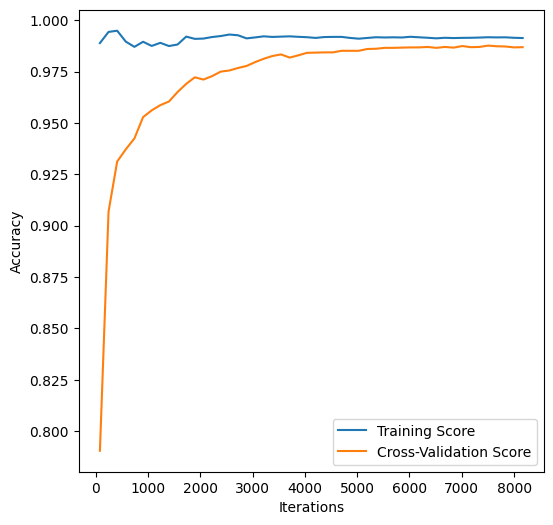

In [23]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()